In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'
from matplotlib import rc
rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern'], 'size' : 18})
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)
# import matplotlib.patches as patches
# from matplotlib.colors import to_rgba

In [2]:
df = pd.read_csv('data/GITaylor_Trinity_data.csv')

In [3]:
df['t_sec'] = df['t_msec'] * 1e-3
df['R_cm'] = df['R_m'] * 1e2

df['log10_t'] = df['t_sec'].apply(lambda x: np.log10(x))
df['log10_R'] = df['R_cm'].apply(lambda x: np.log10(x))
df['5/2*log10_R'] = df['log10_R'] * 5/2
df['5/2*log10R'] = df['log10_R'] * 5/2

# Trinity explosion

In [5]:
df.head()

,t_msec,R_m,t_sec,R_cm,log10_t,log10_R,5/2*log10_R,5/2*log10R
0,0.10,11.1,0.00010,1110.0,-4.000000,3.045323,7.613307,7.613307
1,0.24,19.9,0.00024,1990.0,-3.619789,3.298853,8.247133,8.247133
2,0.38,25.4,0.00038,2540.0,-3.420216,3.404834,8.512084,8.512084
3,0.52,28.8,0.00052,2880.0,-3.283997,3.459392,8.648481,8.648481
4,0.66,31.9,0.00066,3190.0,-3.180456,3.503791,8.759477,8.759477


c:\users\jsdiaz\anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


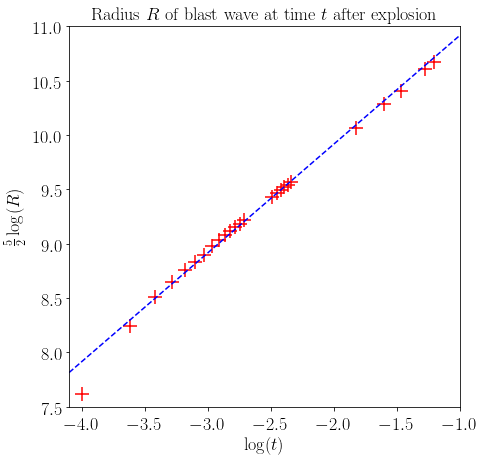

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
xmin, xmax = -4.1, -1
ymin, ymax = 7.5, 11
ax.set_title(r'Radius $R$ of blast wave at time $t$ after explosion', fontsize=18)
ax.scatter(df['log10_t'], df['5/2*log10_R'], s=180, marker='+', color='r')
logt = np.linspace(xmin, xmax, 2)
ax.plot(logt, logt + 11.915, 'b--')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel(r'$\log(t)$', fontsize=18)
ax.set_ylabel(r'$\frac{5}{2}\log(R)$', fontsize=18)
# ax.set_xticklabels(x_ticks, rotation=0, fontsize=15)
# ax.set_yticklabels(y_ticks, rotation=0, fontsize=15)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18);
# fig.savefig('plots/BlastWaveRadius.pdf', bbox_inches='tight')

In [7]:
X = df['log10_t'].values.reshape(1, -1).T
y = df['5/2*log10_R'].values
y.shape, X.shape

((25,), (25, 1))

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
yhat = model.predict(X)

R^2 = 0.99


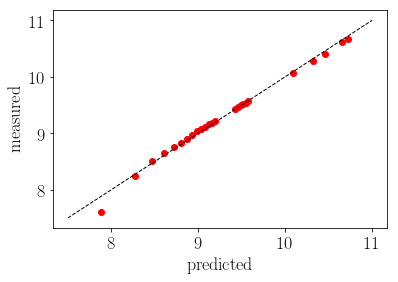

In [9]:
from sklearn.metrics import r2_score
print(f'R^2 = {r2_score(yhat, y):.2f}')
plt.scatter(yhat, y, color='r')
line = np.linspace(7.5, 11)
plt.xlabel('predicted')
plt.ylabel('measured')
plt.plot(line, line, 'k--', linewidth=1);

In [10]:
model.intercept_, model.coef_[0]

(11.94184053505476, 1.0145565627511377)

c:\users\jsdiaz\anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


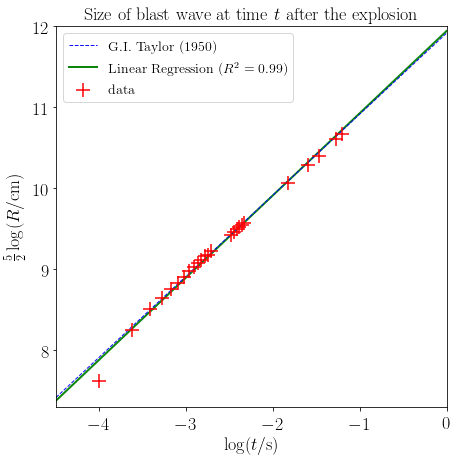

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
xmin, xmax = -4.5, 0
ymin, ymax = 7.3, 12
ax.set_title(r'Size of blast wave at time $t$ after the explosion', fontsize=18)
ax.scatter(df['log10_t'], df['5/2*log10R'], s=180, marker='+', color='r', label='data', zorder=10)
logt = np.linspace(xmin, xmax, 2)
ax.plot(logt, logt + 11.915, 'b--', label='G.I. Taylor (1950)', linewidth=1, zorder=1, alpha=0.95)
ax.plot(logt, model.intercept_ + model.coef_[0] * logt, 'g-', linewidth=2, 
        label=f'Linear Regression ($R^2 = {r2_score(yhat, y):.2f}$)', zorder=0, alpha=0.95)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel(r'$\log(t/\mathrm{s})$', fontsize=18)
ax.set_ylabel(r'$\frac{5}{2}\log(R/\mathrm{cm})$', fontsize=18)
# ax.set_xticklabels(x_ticks, rotation=0, fontsize=15)
# ax.set_yticklabels(y_ticks, rotation=0, fontsize=15)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.legend(fontsize=14);
# fig.savefig('plots/BlastWaveSize.pdf', bbox_inches='tight')

In [52]:
10**(11.94*2) * 0.856 *1e-10 * 1.25 / ( 4.25e9) * 1e-3

19.098306006617054

# Beirut explosion

$ \frac{5}{2} \, \log R = \frac{5}{2} \, \log\left(S \sqrt[5]{\frac{E}{\rho}}\right) + \log t$

In [203]:
# https://twitter.com/sinabooeshaghi/status/1290727092884299778
dfb = pd.DataFrame()
# dfb['R'] = [215/2, 300/2, 350/2, 400/2, 475/2]
dfb['R'] = [185/2, 240/2, 270/2, 315/2, 350/2]
dfb['t'] = [0.050, 0.090, 0.130, 0.180, 0.230]
# dfb['R'] = [191/2, 225/2, 241/2, 258/2, 268/2, 282/2, 307/2]
# dfb['t'] = [0.030, 0.060, 0.110, 0.150, 0.170, 0.200, 0.250]
dfb['5/2*log10_R'] = np.log10(dfb['R'] ) * 5/2
dfb['log10_t'] = np.log10(dfb['t'])
dfb

,R,t,5/2*log10_R,log10_t
0,92.5,0.05,4.915354,-1.301030
1,120.0,0.09,5.197953,-1.045757
2,135.0,0.13,5.325834,-0.886057
3,157.5,0.18,5.493201,-0.744727
4,175.0,0.23,5.607595,-0.638272


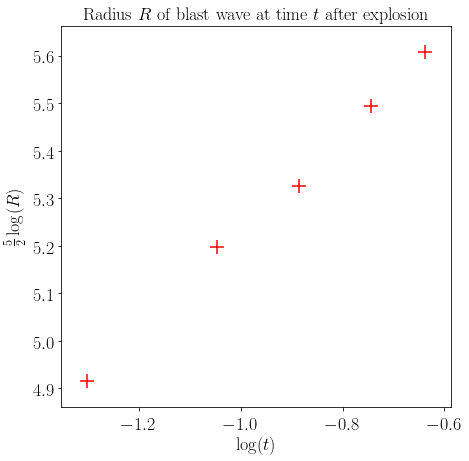

In [204]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
xmin, xmax = -4.1, -1
ymin, ymax = 7.5, 11
ax.set_title(r'Radius $R$ of blast wave at time $t$ after explosion', fontsize=18)
ax.scatter(dfb['log10_t'], dfb['5/2*log10_R'], s=180, marker='+', color='r')
# logt = np.linspace(xmin, xmax, 2)
# ax.plot(logt, logt + 11.915, 'b--')
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
ax.set_xlabel(r'$\log(t)$', fontsize=18)
ax.set_ylabel(r'$\frac{5}{2}\log(R)$', fontsize=18)
# ax.set_xticklabels(x_ticks, rotation=0, fontsize=15)
# ax.set_yticklabels(y_ticks, rotation=0, fontsize=15)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18);
# fig.savefig('plots/BlastWaveRadius.pdf', bbox_inches='tight')

(5,) (5, 1)
R^2 = 1.00


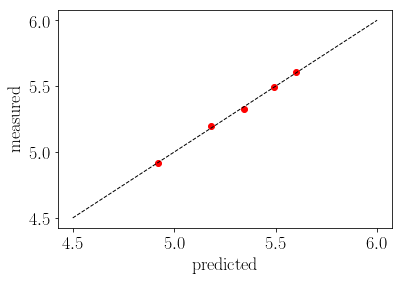

In [208]:
X2 = dfb['log10_t'].values.reshape(1, -1).T
y2 = dfb['5/2*log10_R'].values
print(y2.shape, X2.shape)

model2 = LinearRegression()
model2.fit(X2, y2)
yhat2 = model2.predict(X2)

print(f'R^2 = {r2_score(yhat2, y2):.2f}')
plt.scatter(yhat2, y2, color='r')
line2 = np.linspace(4.5, 6)
plt.xlabel('predicted')
plt.ylabel('measured')
plt.plot(line2, line2, 'k--', linewidth=1);

In [209]:
model2.intercept_, model2.coef_[0]

(6.260756336048827, 1.0320633688783456)

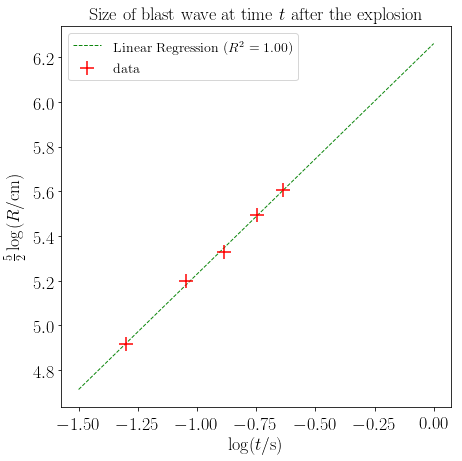

In [210]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
xmin, xmax = -4.5, 0
ymin, ymax = 7.3, 12
ax.set_title(r'Size of blast wave at time $t$ after the explosion', fontsize=18)
ax.scatter(dfb['log10_t'], dfb['5/2*log10_R'], s=180, marker='+', color='r', label='data', zorder=10)
logt2 = np.linspace(-1.5, 0, 2)
# ax.plot(logt, logt + 11.915, 'b--', label='G.I. Taylor (1950)', linewidth=1, zorder=1, alpha=0.95)
ax.plot(logt2, model2.intercept_ + model2.coef_[0] * logt2, 'g--', linewidth=1, 
        label=f'Linear Regression ($R^2 = {r2_score(yhat2, y2):.2f}$)', zorder=0, alpha=0.95)
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
ax.set_xlabel(r'$\log(t/\mathrm{s})$', fontsize=18)
ax.set_ylabel(r'$\frac{5}{2}\log(R/\mathrm{cm})$', fontsize=18)
# ax.set_xticklabels(x_ticks, rotation=0, fontsize=15)
# ax.set_yticklabels(y_ticks, rotation=0, fontsize=15)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.legend(fontsize=14);
# fig.savefig('plots/BlastWaveSize.pdf', bbox_inches='tight')

In [211]:
from scipy.optimize import fsolve
def loss(i, slope):
    """Fixed slope 1-deg polynomial residuals"""
    return ((y2 - (slope*X2 + i))**2).sum()

In [212]:
np.polyfit(dfb['log10_t'].values, y2, 1)

array([1.03206337, 6.26075634])

In [213]:
intercept = fsolve(f, x0=1)[0]
intercept

c:\users\jsdiaz\anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


6.2310445429681165

In [214]:
r2_beirut = r2_score(X2 + intercept, y2)
r2_beirut

0.9962918990856202

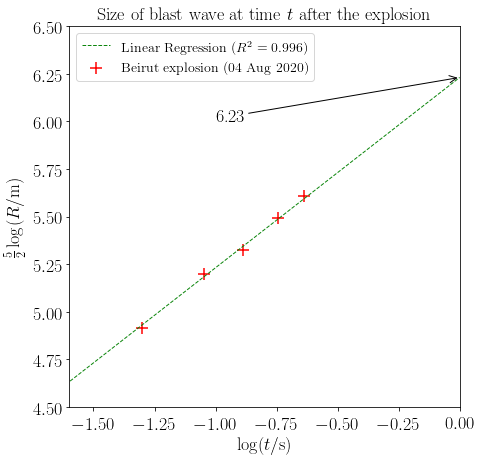

In [222]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
xmin, xmax = -1.6, 0
ymin, ymax = 4.5, 6.5 #9.5, 11.5
ax.set_title(r'Size of blast wave at time $t$ after the explosion', fontsize=18)
# Beirut
ax.scatter(dfb['log10_t'], dfb['5/2*log10_R'], s=150, marker='+', color='r', label='Beirut explosion (04 Aug 2020)', zorder=0)
logt2 = np.linspace(-5, 0, 2)
ax.plot(logt2, intercept + logt2, 'g--', linewidth=1, 
        label=f'Linear Regression ($R^2 = {r2_beirut:.3f}$)', zorder=1, alpha=0.95)

ax.annotate(f'{intercept:.2f}', xy=(0, intercept), xytext=(-1, 6), arrowprops=dict(facecolor='black', arrowstyle='->'))

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel(r'$\log(t/\mathrm{s})$', fontsize=18)
ax.set_ylabel(r'$\frac{5}{2}\log(R/\mathrm{m})$', fontsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.legend(fontsize=14, loc='upper left');
fig.savefig('plots/BlastWaveSize_Beirut.pdf', bbox_inches='tight')

In [225]:
E_J = 10**(intercept * 2/5 * 5) * 1.25 * 0.856 
print(f'energy = {E_J:.2e} J')

energy = 3.10e+12 J


In [234]:
print(f'energy = {E_J/4.25e12:.3f} kt')

energy = 0.730 kt


In [236]:
f'{1447.7/1e-3 * 2750e3 * 1/4.25e12:.1e}'

'9.4e-01'